<a href="https://colab.research.google.com/github/RanjuRamya/Emotiondetect/blob/main/EmotionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
!unzip train.zip?dl=0

--2024-06-24 11:02:06--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=0 [following]
--2024-06-24 11:02:07--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf7d7abdb5349bce71b2ff492d0.dl.dropboxusercontent.com/cd/0/inline/CVadI5ceDI1o07YaN2tO2SRjbxpBSLmYFtLf2LXPSOj5jszm7Fpr9FfEWHG0CuLoFsNuIYoxaR_8HIe3Xu-aEgPp2GWKzvZyYFaZnX1qfmGGeR90_SR_1CCkLigJsw9n6jg3c4CeQZH9hSp91QihDyOD/file# [following]
--2024-06-24 11:02:07--  https://ucf7d7abdb5349bce71b2ff492d0.dl.dropboxusercontent.com/cd/0/in

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.models import Model
from keras.layers import Flatten,Dense


from keras.preprocessing.image import  ImageDataGenerator , img_to_array,load_img

In [ ]:

#working with pre trained model i.e MobileNet
base_model=MobileNet(input_shape=(224,224,3),include_top=False)


for layer in base_model.layers: #to prevent retraining of the model
  layer.trainable=False  #every layer trainablety is false


x=Flatten()(base_model.output)
x=Dense(units=7,activation='softmax')(x)

#creating our model

model=Model(base_model.input,x)






17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])


In [ ]:
train_datagen=ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)
train_data=train_datagen.flow_from_directory(directory="/content/train",target_size=(224,224),batch_size=32,
                                             )
train_data.class_indices


Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
train_datagen=ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)

train_data =train_datagen.flow_from_directory(directory="/content/train",
                                              target_size=(224,224),
                                              batch_size=32,)
train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen=ImageDataGenerator(rescale=1/255)
val_data=val_datagen.flow_from_directory(directory="/content/train",
                                target_size=(224,224),
                                batch_size=32,)

Found 350 images belonging to 7 classes.


In [ ]:
t_img,label=train_data.next()
def plotImages(img_arr,label):
  count=0
  for im,l in zip(img_arr,label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis=False
    plt.show()

    count +=  1
    if count == 10:
      break



In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=5,verbose=1,mode='auto')
nc=ModelCheckpoint(filepath="Best_model.h5",monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')
call_back=[es,nc]

In [ ]:
hist=model.fit_generator(train_data,steps_per_epoch=10,epochs=30,validation_data=val_data,validation_steps=8,callbacks=[es,nc])

<ipython-input-11-052780af76cb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_data,steps_per_epoch=10,epochs=30,validation_data=val_data,validation_steps=8,callbacks=[es,nc])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 9.1986 - accuracy: 0.2233
Epoch 1: val_accuracy improved from -inf to 0.44141, saving model to Best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 54s 5s/step - loss: 9.1986 - accuracy: 0.2233 - val_loss: 4.6757 - val_accuracy: 0.4414
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.4126 - accuracy: 0.5283
Epoch 2: val_accuracy improved from 0.44141 to 0.72656, saving model to Best_model.h5
10/10 [==============================] - 38s 4s/step - loss: 3.4126 - accuracy: 0.5283 - val_loss: 1.8467 - val_accuracy: 0.7266
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.2986 - accuracy: 0.7925
Epoch 3: val_accuracy improved from 0.72656 to 0.83203, saving model to Best_model.h5
10/10 [==============================] - 38s 4s/step - loss: 1.2986 - accuracy: 0.7925 - val_loss: 1.0257 - val_accuracy: 0.8320
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.8918 - accuracy: 0.8239
Epoch 4: val_accuracy improved from 0.83203 to 0.91797, saving model to Best_model.h5
10/10 [==============================] - 40s 4s/step - loss: 0.8918 - acc

In [ ]:
from keras.models import load_model
model=load_model("/content/Best_model.h5")

In [ ]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

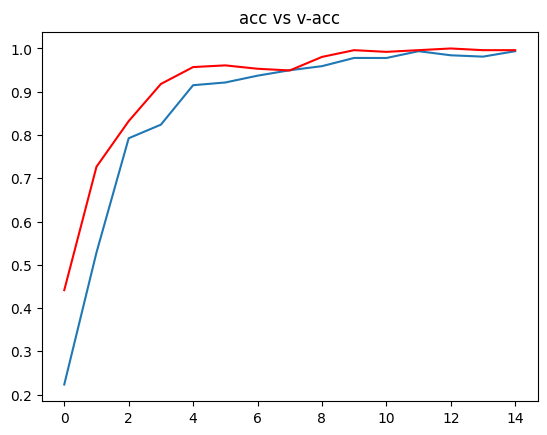

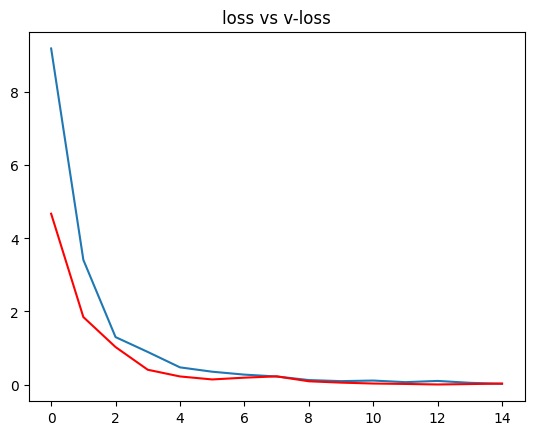

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
op=dict(zip(train_data.class_indices.values(),train_data.class_indices.keys()))




1/1 [==============================] - 0s 145ms/step
the image is ofHappy


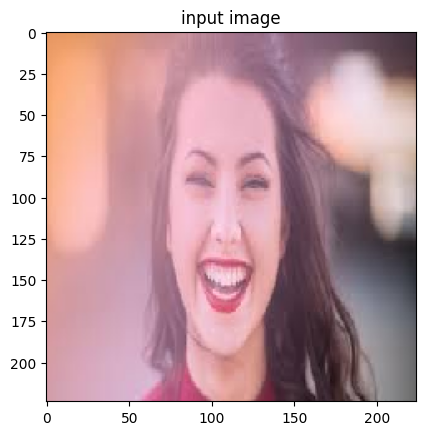

In [ ]:
path="/content/download (1).jpg
"
img=load_img(path,target_size=(224,224))

i=img_to_array(img)/255
input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

print(f"the image is of{op[pred]}")

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()




In [ ]:
import cv2
from deepface import DeepFace

def recognize_emotion(frame):
    try:
        # Analyze the frame for emotions
        analysis = DeepFace.analyze(frame, actions=['emotion'])
        return analysis['dominant_emotion']
    except Exception as e:
        print(f"Error in emotion analysis: {e}")
        return None

def main():
    # Open the webcam
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        if not ret:
            print("Error: Could not read frame.")
            break

        # Perform emotion recognition
        emotion = recognize_emotion(frame)

        # Display the results
        if emotion:
            cv2.putText(frame, f'Emotion: {emotion}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Display the resulting frame
        cv2.imshow('Emotion Recognition', frame)

        # Break the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close windows
    cap.release()
    cv2.destroyAllWindows()

if _name_ == "_main_":
    main()

NameError: name '_name_' is not defined

In [ ]:
import cv2
from deepface import DeepFace

def recognize_emotion(frame):
    try:
        # Analyze the frame for emotions
        analysis = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        return analysis[0]['dominant_emotion']
    except Exception as e:
        print(f"Error in emotion analysis: {e}")
        return None

def main():
    # Open the webcam
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        if not ret:
            print("Error: Could not read frame.")
            break

        # Perform emotion recognition
        emotion = recognize_emotion(frame)

        # Display the results
        if emotion:
            cv2.putText(frame, f'Emotion: {emotion}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Display the resulting frame
        cv2.imshow('Emotion Recognition', frame)

        # Break the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close windows
    cap.release()
    cv2.destroyAllWindows()

if _name_ == "_main_":
    main()

NameError: name '_name_' is not defined

In [ ]:
pip install opencv-python-headless deepface

In [ ]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 10.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=aeb8f15e8f7b0a073ef161f98d293f3e179b9c5a9313e8d4f8fdfb43a94d8c90
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [ ]:

import os
import cv2
import numpy as np
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import load_img,img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np


model=load_model("/content/best_model (2).h5")
face_haar_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascde_frontalface_default.xml')

cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()
    if not ret:
        continue
    gray_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)

    faces_detected=face_haar_cascade.detectMultiScale(gray_img,1.32,5)

    for(x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]



        roi_gray=cv2.resize(roi_gray,(224,224))
        img_pixels=image.img_to_array(roi_gray)
        img_pixels=np.expand_dims(img_pixels,axis=0)
        img_pixels /= 255

        predictions=model.predict(img_pixels)

        max_index=np.argmax(predictions[0])

        emotions=('angry','disgust','fear','happy','sad','surprise','neutral')
        predicted_emotion=emotions[max_index]

        cv2.putText(test_img,predicted_emotion,(int(x),int(y)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)

    resized_img=cv2.resize(test_img,(1000,700))
    cv2.imshow('Facial emotion analysis',resized_img)


    if cv2.waitKey(10) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows

KeyboardInterrupt: 

In [ ]:
import os
import cv2
import numpy as np
import warnings
import joblib
from keras.preprocessing import image
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Load the pre-trained model
model = joblib.load("/content/best_model (2).h5")

# Load the Haar Cascade file for face detection
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # Capture frame-by-frame
    if not ret:
        continue

    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale
    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)  # Detect faces

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)  # Draw rectangle around face
        roi_gray = gray_img[y:y + w, x:x + h]  # Crop the face

        # Resize and preprocess the face region
        roi_gray = cv2.resize(roi_gray, (48, 48))  # Assuming your model expects 48x48 input
        img_pixels = roi_gray.flatten().reshape(1, -1)  # Flatten and reshape

        # Predict the emotion
        predictions = model.predict_proba(img_pixels)
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        # Display the emotion
        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial Emotion Analysis', resized_img)

    if cv2.waitKey(10) == ord('q'):  # Press 'q' to exit
        break

cap.release()
cv2.destroyAllWindows()


KeyError: 72

In [ ]:
import os
import cv2
import numpy as np
import warnings
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Load the pre-trained model
model = load_model("/content/best_model (2).h5")

# Load the Haar Cascade file for face detection
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # Capture frame-by-frame
    if not ret:
        continue

    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale
    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)  # Detect faces

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)  # Draw rectangle around face
        roi_gray = gray_img[y:y + w, x:x + h]  # Crop the face

        # Resize and preprocess the face region
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        # Predict the emotion
        predictions = model.predict(img_pixels)
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        # Display the emotion
        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX,


SyntaxError: incomplete input (<ipython-input-5-d0b6ffb47a45>, line 46)

In [ ]:
import os
import cv2
import numpy as np
import warnings
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Load the pre-trained model
model = load_model("/content/best_model (2).h5")

# Load the Haar Cascade file for face detection
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # Capture frame-by-frame
    if not ret:
        continue

    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale
    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)  # Detect faces

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)  # Draw rectangle around face
        roi_gray = gray_img[y:y + w, x:x + h]  # Crop the face

        # Resize and preprocess the face region
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        # Predict the emotion
        predictions = model.predict(img_pixels)
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        # Display the emotion
        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial Emotion Analysis', resized_img)

    if cv2.waitKey(10) == ord('q'):  # Press 'q' to exit
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [ ]:
import os
import cv2
import numpy as np
import warnings
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Load the pre-trained model
model = load_model("/content/Best_model (2).h5")

# Load the Haar Cascade file for face detection
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # Capture frame-by-frame
    if not ret:
        continue

    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale
    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)  # Detect faces

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)  # Draw rectangle around face
        roi_gray = gray_img[y:y + w, x:x + h]  # Crop the face

        # Resize and preprocess the face region
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        # Predict the emotion
        predictions = model.predict(img_pixels)
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        # Display the emotion
        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial Emotion Analysis', resized_img)

    if cv2.waitKey(10) == ord('q'):  # Press 'q' to exit
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import load_model

# Load images and labels
data_dir = "/content/images/"
labels = []
images = []

for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("jpg"):
            labels.append(os.path.basename(root))
            img_path = os.path.join(root, file)
            img = cv2.imread(img_path)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img_gray.flatten())

# Convert labels to integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Feature scaling
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images)

# Load your pre-trained SVM model
svm_model = load_model("/content/Best_model (2).h5")

# Reshape the input data
images_scaled_reshaped = images_scaled.reshape(-1, images_scaled.shape[1])

# Perform predictions
predictions = svm_model.predict(images_scaled_reshaped)

# Decode the predicted labels
predicted_labels = label_encoder.inverse_transform(predictions)

# Print the predicted labels
print(predicted_labels)
